Urban Data Science & Smart Cities <br>
URSP688Y <br>
Instructor: Chester Harvey <br>
Urban Studies & Planning <br>
National Center for Smart Growth <br>
University of Maryland

[<img src="https://colab.research.google.com/assets/colab-badge.svg"> Clean version](https://colab.research.google.com/github/ncsg/ursp688y_sp2024/blob/main/demos/demo04/demo04.ipynb)

[<img src="https://colab.research.google.com/assets/colab-badge.svg"> Modified in class](https://colab.research.google.com/drive/19CYqhrg5dt1HvG-eBEzpL-HF27e8K_av?usp=sharing)

# Demo 5 - Basic Data Visualization

- PR demo: from notebook to merge
- Principles of graphic communication
- Matplotlib
- Pandas `plot` method
- Seaborn
- Export to Illustrator
- Best and worst viz contest 

## New office hours time: 1-3pm on Tuesdays

## PR demo: from notebook to merge

## Principles of graphic communication

### More is less
Remove ink until the last thing you removed changes the meaning; add that back and quit.

#### "Chartjunk" ([Tufte](https://www.edwardtufte.com/bboard/q-and-a-fetch-msg?msg_id=00040Z))

<img src="https://www.edwardtufte.com/bboard/images/00040Z-22525/BEp175.jpg" alt="chartjunk"/>

([Source: Edward Tufte](https://www.edwardtufte.com/bboard/q-and-a-fetch-msg?msg_id=00040Z))

#### An editing sequence

<img src="https://www.qimacros.com/free-excel-tips/graphical-excellence/bar-chartjunk1.png" alt="excel graph"/>

- Legend is redundant with title
- X-axis labels are redundant ("Project")
- Gridlines are unnecessary
- Frame around the plot (neat line) doesn't have meaning
- Bar style (with outline) is unnecessarily complicated

<img src="https://www.qimacros.com/free-excel-tips/graphical-excellence/bar-chartjunk2.png" alt="better graph"/>

Better to order values?

<img src="https://www.qimacros.com/free-excel-tips/graphical-excellence/bar-chartjunk3.png" alt="even better graph"/>

([Source: qimacros.com](https://www.qimacros.com/free-excel-tips/graphical-excellence/))

Can we make it even better?

<img src="https://github.com/ncsg/ursp688y_sp2024/blob/main/demos/demo05/error_rate_graph.png?raw=true" alt="can we make it even better?" width="600"/>

### Visual hierarchy (figure-ground)

The most important information should stand out. 

Visual variables at your disposal for communicating hierarchy:
- Size
- Order
- Spacing
- Color saturation/value/contrast
- Texture

<img src="https://www.graphicdesignforum.com/uploads/default/original/2X/d/d9cf78fffdcf72b0179dcb26efc14cdbd39854ff.jpeg" alt="graphic design has rules" width="300"/>

([Source: graphicdesignforum.com](https://www.graphicdesignforum.com/t/you-will-read-this-first/13726))

#### Good figure-ground

"Color and brightness contrast let the land come forward from the ocean, and things like the river come forward from the land." ([Axis Maps](https://www.axismaps.com/guide/visual-hierarchy))

<img src="https://uploads-ssl.webflow.com/5f6a4786fa53db61032919f9/5fa4480f73455816dc71ace1_figure_ground_good.jpeg" alt="bad figure-ground"/>

#### Less good figure-ground

"Low contrasts make it harder and slower to pick out any salient elements." ([Axis Maps](https://www.axismaps.com/guide/visual-hierarchy))

<img src="https://uploads-ssl.webflow.com/5f6a4786fa53db61032919f9/5fa4480f6854b572eb93b9a1_figure_ground_bad.jpeg" alt="less good figure-ground"/>

([Source: Axis Maps](https://www.axismaps.com/guide/visual-hierarchy))

### Alignment and consistency

Messiness looks like sloppiness looks like ineptitude.

<img src="https://visme.co/blog/wp-content/uploads/2015/12/alignment.jpg" alt="bad alignment" width="500"/>

<img src="https://visme.co/blog/wp-content/uploads/2015/12/fixed3.jpg" alt="2-3 fonts, different weights of same typeface" width="500"/>

([Source: visme.co](https://visme.co/blog/graphic-design-rules/))

[Examples of bad maps.](https://storymaps.arcgis.com/stories/6b168cb3aeb44c84b3ce04ca7fe5222e)

### Gestalt principles

<img src="https://assets-global.website-files.com/5b69a01ba2e409501de055d1/642188a15110ca0a392afaab_Gestalt%20Principles.png" alt="gestalt principles"/>

([Source: Structural Learning](https://www.structural-learning.com/post/gestalt-psychology))

### Visual variables

<img src="https://uploads-ssl.webflow.com/5f6a4786fa53db61032919f9/5fa44835ab735150a7e18135_visual_variables.png" alt="bertin's visual variables" width="800"/>

([Source: Axis Maps](https://www.axismaps.com/guide/visual-variables))

### Use an appropriate chart type

#### Bar: Discrete quantities
<img src="https://chartio.com/images/tutorials/charts/essential-chart-types/bar-chart.png" alt="bar plot example"/>

#### Line: Quantities that vary continuously, even if only sampled sporadically
<img src="https://chartio.com/images/tutorials/charts/essential-chart-types/line-chart.png" alt="line plot example"/>

#### Scatter: Discrete (or continuous) quantities in two dimensions
<img src="https://chartio.com/images/tutorials/charts/essential-chart-types/scatter-plot.png" alt="scatter plot example"/>

#### Box plot: Distribution of a sample
<img src="https://chartio.com/images/tutorials/charts/essential-chart-types/box-plot.png" alt="box plot example"/>

#### Notice I haven't shown you a pie chart?
- Useful in certain circumstances: to emphasize balance or imbalance in quantities
- Very difficult to make comparisons between slices or pies
- Use sparingly
- Usually terrible with more than five slices
- <ins>Always</ins> put labels directly on/in/next to slices
- Consider a stacked bar chart instead

([Source: Chartio](https://chartio.com/learn/charts/essential-chart-types-for-data-visualization/))

## [Matplotlib](https://matplotlib.org/)

Now let's think about how to make charts in Python.

Matplotlib is the package behind the scenes for nearly all plotting in Python.

It's very flexible/capable/customizable, but also very clunky and non-intuitive.

It often feels like it requires an inordinate amount of code to produce a chart.

Nonetheless, you will run into it as a way to customize plots from other packages.

In [1]:
import matplotlib.pyplot as plt

Before we get into automated plotting tools, I want to show how plotting is, at a basic level, just drawing things with coordinates. If you need to make something highly customized, you can program it with Matplotlib.

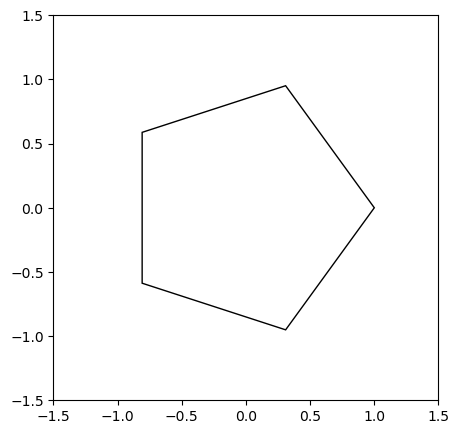

In [2]:
import numpy as np

def construct_polygon(num_vertices):
    """
    Adapted from ChatGPT4.0 query: "write a python function to draw a pentagon in matplotlib"
    """
    # Angle between vertices
    angle = 2 * np.pi / num_vertices
    # Generate the vertices
    vertices = [(np.cos(i * angle), np.sin(i * angle)) for i in range(num_vertices)]
    # Adding the first vertex at the end to close the pentagon
    vertices.append(vertices[0])
    # Return the coordinates as x and y lists
    return zip(*vertices)

def plot_polygon(num_vertices):
    """
    Adapted from ChatGPT4.0 query: "write a python function to draw a pentagon in matplotlib"
    """
    x, y = construct_polygon(num_vertices)
    plt.figure(figsize=(5,5))
    plt.fill(x, y, 'w', edgecolor='k')
    plt.xlim(-1.5, 1.5)
    plt.ylim(-1.5, 1.5)
    plt.gca().set_aspect('equal', adjustable='box')  # Equal aspect ratio to ensure the pentagon looks correct
    plt.show()

plot_polygon(5)

### Plotting data from a DataFrame

In [3]:
import pandas as pd

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')
# os.chdir('/content/drive/MyDrive/ursp688y_shared_data')

In [5]:
df = pd.read_csv('affordable_housing.csv')
df.head()

,X,Y,OBJECTID,MAR_WARD,ADDRESS,PROJECT_NAME,STATUS_PUBLIC,AGENCY_CALCULATED,TOTAL_AFFORDABLE_UNITS,LATITUDE,...,AFFORDABLE_UNITS_AT_31_50_AMI,AFFORDABLE_UNITS_AT_51_60_AMI,AFFORDABLE_UNITS_AT_61_80_AMI,AFFORDABLE_UNITS_AT_81_AMI,CASE_ID,MAR_ID,XCOORD,YCOORD,FULLADDRESS,GIS_LAST_MOD_DTTM
0,-77.009383,38.910255,89281,Ward 6,"1520 North Capitol Street Northwest, Washingto...",Cycle House,Under Construction,DMPED DHCD,18,38.910248,...,4,12,0,0,NaN,331764,399186.36,138042.91,1520 NORTH CAPITOL STREET NW,2024/02/05 05:00:27+00
1,-77.009436,38.906403,89282,Ward 6,"1200 North Capitol Street Northwest, Washingto...",Tyler House Apartments,Completed 2015 to Date,DCHFA,284,38.906396,...,0,284,0,0,NaN,237128,399181.75,137615.28,1200 NORTH CAPITOL STREET NW,2024/02/05 05:00:27+00
2,-77.030061,38.962519,89283,Ward 4,"5922 13th Street Northwest, Washington, Distri...",Valencia Apartments,Completed 2015 to Date,DHCD,29,38.962511,...,0,29,0,0,NaN,243483,397394.87,143845.04,5922 13TH STREET NW,2024/02/05 05:00:27+00
3,-76.950868,38.922332,89284,Ward 5,"3814 Fort Lincoln Drive Northeast, Washington,...",Villages at Dakota Crossing Phase III,Completed 2015 to Date,DMPED,24,38.922333,...,0,0,24,0,NaN,310077,404260.75,139384.60,3814 FORT LINCOLN DRIVE NE,2024/02/05 05:00:27+00
4,-77.033056,38.967357,89285,Ward 4,"1388 Tuckerman Street Northwest, Washington, D...",Vizcaya Apartments,Completed 2015 to Date,DHCD,17,38.967349,...,0,17,0,0,NaN,257527,397135.52,144382.12,1388 TUCKERMAN STREET NW,2024/02/05 05:00:27+00


In [6]:
# Let's make a bar chart showing the number of projects in each ward
ward_counts = df['MAR_WARD'].value_counts()
ward_counts

MAR_WARD
Ward 5    181
Ward 4    149
Ward 6    145
Ward 8    123
Ward 1    116
Ward 7     88
Ward 2     47
Ward 3     28
1           1
Name: count, dtype: int64

In [7]:
# Let's manually adjust the inconsistent data

# Find its location in the dataframe
idx = df[df['MAR_WARD'] == '1'].index[0]
print(f'inconsistent ward label is at index {idx}')

# Assign that cell a more consistently formatted value
df.at[220, 'MAR_WARD'] = 'Ward 1'

# Check that it's not longer inconsistent
ward_counts = df['MAR_WARD'].value_counts()
ward_counts

inconsistent ward label is at index 220


MAR_WARD
Ward 5    181
Ward 4    149
Ward 6    145
Ward 8    123
Ward 1    117
Ward 7     88
Ward 2     47
Ward 3     28
Name: count, dtype: int64

In [8]:
names = ward_counts.index
counts = ward_counts.values

In [9]:
# Can we make the names simpler?

# This is a "list comprehension." It's a mini for loop.

# names = [name.split()[1] for name in names]
# names

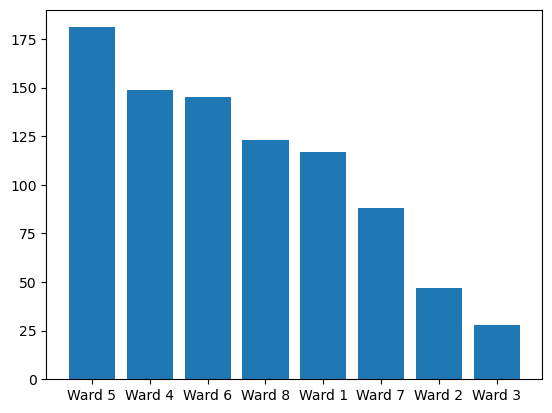

In [10]:
# Define the figure object (like a piece of paper)
fig = plt.figure()
# Define an axis within the figure (coordinate space) 
ax = fig.add_subplot(111) # an axis on a 1x1 grid in first position
# Draw a bar chart within the axis
ax.bar(names, counts)

# Customize the plot
# # Remove frames on right and top
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)
# # Define fonts
# font = {'fontname': 'Arial'}
# title_font = {**font, **{'fontweight':'bold'}} # {**dict1, **dict2} combines two dictionaries
# # Set font for ticks
# plt.yticks(**font) # **dict in a function call expands the dictionary keys into keyword arguments
# plt.xticks(**font)
# # Set title and axis labels
# plt.title('Projects by Ward', title_font)
# plt.xlabel('Ward', title_font) 
# plt.ylabel('Projects', title_font)

# Show the completed plot
plt.show()

## Pandas `plot` method

In [11]:
ward_counts

MAR_WARD
Ward 5    181
Ward 4    149
Ward 6    145
Ward 8    123
Ward 1    117
Ward 7     88
Ward 2     47
Ward 3     28
Name: count, dtype: int64

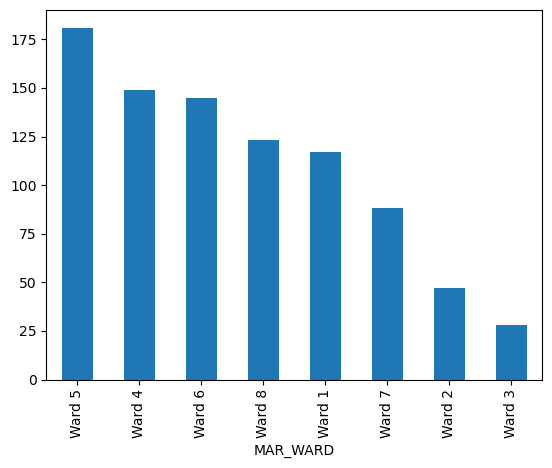

In [12]:
# Plotting a series
ax = ward_counts.plot.bar()

# You can still customize with Matplotlib
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)

plt.show() # This just avoids a text output

## [Seaborn](https://seaborn.pydata.org/)

Better visual defaults and smart aggregation with statistics

[Examples](https://seaborn.pydata.org/examples/index.html)

In [13]:
import seaborn as sns
sns.set_style('ticks')

[`countplot` function](https://seaborn.pydata.org/generated/seaborn.countplot.html)

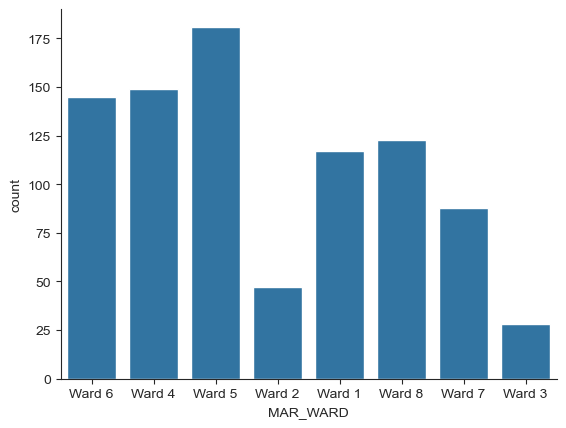

In [14]:
sns.countplot(df, x='MAR_WARD')
sns.despine()

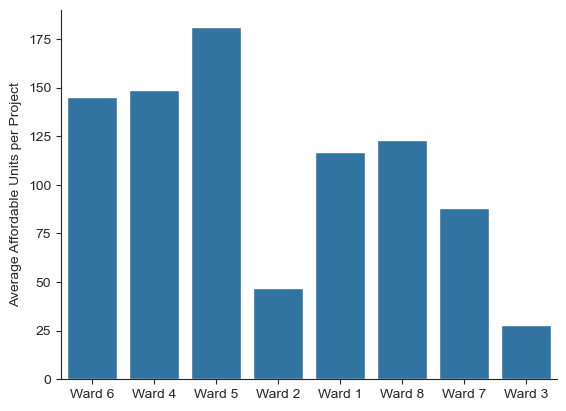

In [15]:
ax = sns.countplot(df, x='MAR_WARD')
ax.set(
    xlabel=None, 
    ylabel='Average Affordable Units per Project'
)
sns.despine()

[`barplot` Function](https://seaborn.pydata.org/generated/seaborn.barplot.html)

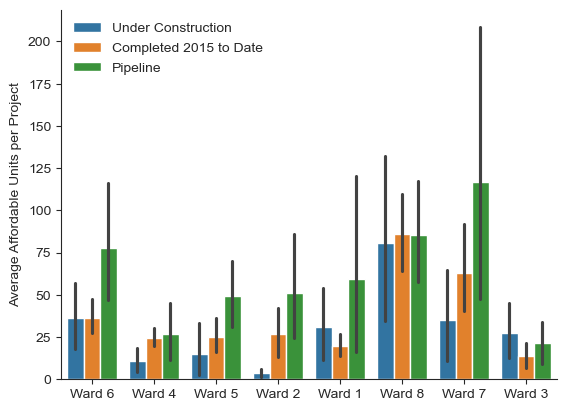

In [16]:
# fig = plt.figure() # Not entirely necessary, but helpful for ensuring you're starting with a blank canvas
ax = sns.barplot(df, x='MAR_WARD', y='TOTAL_AFFORDABLE_UNITS', hue="STATUS_PUBLIC")
ax.set(
    xlabel=None, 
    ylabel='Average Affordable Units per Project'
)
plt.legend(title=None, frameon=False)
sns.despine()

And, of course, we can tidy up our code by writing a custom plot function and putting it in a module.

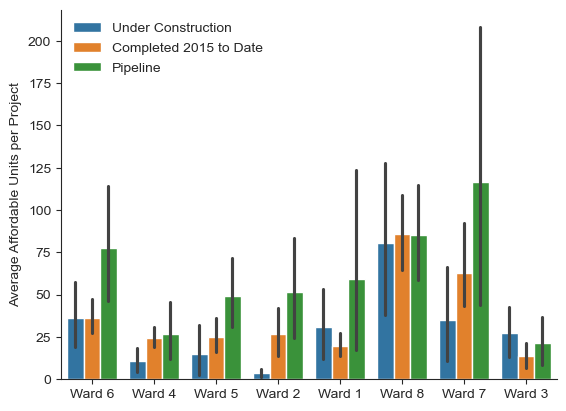

In [17]:
from demo05 import plot_average_affordable_units_by_status

fig = plot_average_affordable_units_by_status(df)

## Exporting to Illustrator

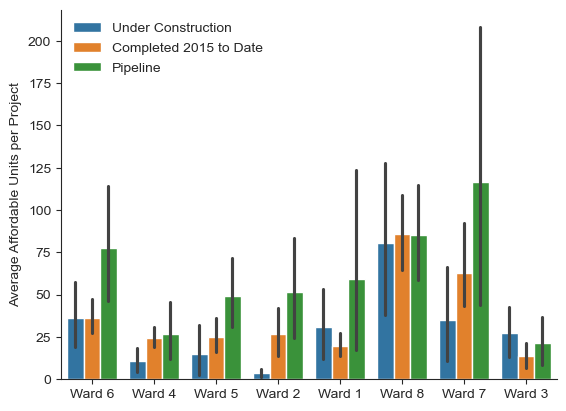

In [18]:
# Let's check what's stored in the `fig` variable
fig

In [19]:
fig.savefig('plot.eps', format='eps')

In [20]:
fig.savefig('plot.png', format='png', dpi=300)